In [3]:
# Import libraries 
import pandas as pd
import pyodbc
from datetime import datetime, date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [320]:
# Creating a connection to sql server
conn_str = ("Driver={SQL Server Native Client 11.0};"
            "Server=mskl-db-server.database.windows.net;"
            "Database=tigeranalytics;"
            "UID=tigerlearner;"
            "PWD=AsDf1234;")
conn = pyodbc.connect(conn_str)

In [80]:
customer_table = pd.read_sql("""select * from marketing_customers_ml""", conn)
order_df = pd.read_sql("select * from marketing_orders_ml", conn)
order_table = order_df.copy()
transactions_table = pd.read_sql("select * from marketing_transactions_ml", conn)

In [ ]:
customer_table.to_csv('customer.csv', index=False)
order_table.to_csv('order.csv', index=False)
transactions_table.to_csv('transactions.csv', index=False)

In [488]:
customer_table = pd.read_csv('customer.csv')
order_table = pd.read_csv('order.csv')
transactions_table = pd.read_csv('transactions.csv')

In [489]:
# Reading Campaign data 
campaign_data = pd.read_csv('campaign_data.csv')
campaign_data.head()

,customer_id,treatment,conversion,visit,exposure,class
0,IN-Hung-15894,1,0,0,0,Lost Cause
1,IN-Jais-17512,1,0,0,0,Lost Cause
2,IN-Akle-17369,1,0,0,0,Lost Cause
3,IN-Deol-71539,1,0,0,0,Lost Cause
4,IN-Puja-7705,1,0,0,0,Lost Cause


## Data Discovery

In [490]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104064 entries, 0 to 104063
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  104064 non-null  object
 1   treatment    104064 non-null  int64 
 2   conversion   104064 non-null  int64 
 3   visit        104064 non-null  int64 
 4   exposure     104064 non-null  int64 
 5   class        104064 non-null  object
dtypes: int64(4), object(2)
memory usage: 4.8+ MB


In [491]:
campaign_data['class'].unique()

array(['Lost Cause', 'Persuadables', 'Sure Thing', 'Dont Disturb'],
      dtype=object)

In [492]:
print("customer_table info ")
print(customer_table.info())

customer_table info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104064 entries, 0 to 104063
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   name         104064 non-null  object
 1   city         104064 non-null  object
 2   country      104064 non-null  object
 3   customer_id  104064 non-null  object
 4   phn_no       104064 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 4.0+ MB
None


In [493]:
df = customer_table.dropna(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104064 entries, 0 to 104063
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   name         104064 non-null  object
 1   city         104064 non-null  object
 2   country      104064 non-null  object
 3   customer_id  104064 non-null  object
 4   phn_no       104064 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 4.0+ MB


In [494]:
print("order_table info ")
print(order_table.info())

order_table info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615083 entries, 0 to 615082
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_id                       615083 non-null  object
 1   customer_id                    615083 non-null  object
 2   Product_Name                   615063 non-null  object
 3   category_name                  614919 non-null  object
 4   order_purchase_date            615083 non-null  object
 5   order_estimated_delivery_date  615083 non-null  object
 6   order_customer_delivery_date   615083 non-null  object
 7   status                         615068 non-null  object
dtypes: object(8)
memory usage: 37.5+ MB
None


* There are Null value in 'Product_Name', 'category_name' and 'status' columns


In [495]:
# Replacing all '\N' and 'Nan' with None, these values most probabily are Null values 
order_table.replace('\\N',None,inplace=True)
order_table.replace(np.nan,None,regex=True, inplace=True)

                                                 column_name  percent_missing
order_id                                            order_id         0.000000
customer_id                                      customer_id         0.000000
Product_Name                                    Product_Name         0.003252
category_name                                  category_name         1.326162
order_purchase_date                      order_purchase_date         0.000000
order_estimated_delivery_date  order_estimated_delivery_date         0.000000
order_customer_delivery_date    order_customer_delivery_date         0.000000
status                                                status         0.003089


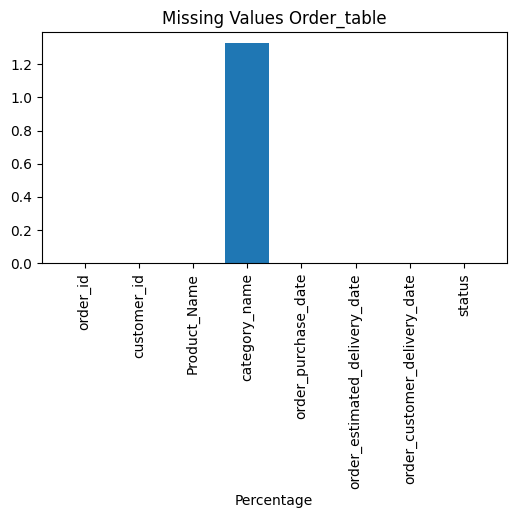

In [496]:
percent_missing = order_table.isnull().sum() * 100 / len(order_table)
missing_value_df = pd.DataFrame({'column_name': order_table.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)
plt.figure(figsize=(6, 3))
plt.bar(missing_value_df['column_name'],missing_value_df['percent_missing'])
plt.title('Missing Values Order_table')
plt.xlabel('Percentage')
plt.xticks(rotation=90)
plt.show()

In [497]:
# Checking if '\N' Values are replaced with Null or not 
order_table.category_name.unique()

array(['Beauty & Grooming', "Women's Fashion", 'Mobiles & Tablets',
       'Appliances', "Men's Fashion", 'Others', 'Home & Living',
       'Soghaat', 'Computing', 'Health & Sports', 'Kids & Baby',
       'Entertainment', 'Superstore', None, 'School & Education', 'Books'],
      dtype=object)

Checking Unique values and their counts in category_name column

Mobiles & Tablets     121735
Men's Fashion          97591
Women's Fashion        66580
Appliances             53948
Superstore             44522
Beauty & Grooming      44080
Soghaat                35467
Others                 29382
Home & Living          28713
Entertainment          27276
Health & Sports        18285
Kids & Baby            17416
Computing              16559
School & Education      3502
Books                   1870
Name: category_name, dtype: int64


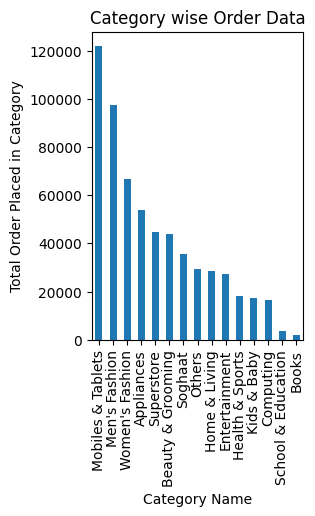

In [498]:
print(order_table.category_name.value_counts())
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
plt.title('Category wise Order Data')
plt.xlabel('Category Name')
plt.ylabel('Total Order Placed in Category')
order_table.category_name.value_counts().plot.bar()

plt.show()

* Mobile & Tablets is top selling category in which maximum order are placed.
* Socend Top category is 'Men`s Fashion' category.
* Least number of order placed in 'Books' category

We will replace None values in category_name column with 'Others' category 


complete          250084
canceled          208141
received           79459
order_refunded     63350
refund              8750
cod                 2859
paid                1159
closed              1072
payment_review        57
pending               48
processing            33
holded                31
fraud                 10
pending_paypal         7
exchange               4
Name: status, dtype: int64


<AxesSubplot: >

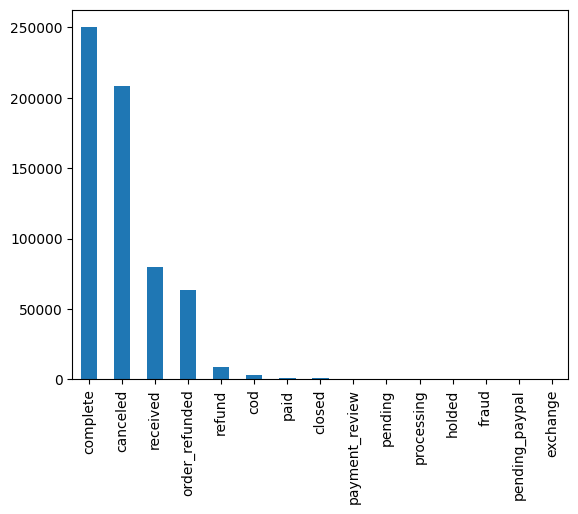

In [499]:
print(order_table.status.value_counts())
order_table.status.value_counts().plot.bar()

* Maximum number of orders status is 'complete'.
* followed by on second number order 'canceled' status' 

we will replace None values in status column with 'complete' status 


In [500]:
# Filling None values in category_name column with "Others" category
order_table['category_name'].fillna('Others',inplace=True)

# Filling None values in Product_Name column with most frequent Product_Name

order_table['Product_Name'].fillna(order_table['Product_Name'].mode()[0], inplace=True)

# Replacing 'None' status values in status column as 'complete'
order_table['status'].fillna('complete', inplace=True)



In [501]:
order_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615083 entries, 0 to 615082
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_id                       615083 non-null  object
 1   customer_id                    615083 non-null  object
 2   Product_Name                   615083 non-null  object
 3   category_name                  615083 non-null  object
 4   order_purchase_date            615083 non-null  object
 5   order_estimated_delivery_date  615083 non-null  object
 6   order_customer_delivery_date   615083 non-null  object
 7   status                         615083 non-null  object
dtypes: object(8)
memory usage: 37.5+ MB


In [502]:
transactions_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615083 entries, 0 to 615082
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   order_id         615083 non-null  object 
 1   customer_id      615083 non-null  object 
 2   TRANS_ID         615083 non-null  object 
 3   price            615083 non-null  float64
 4   discount_amount  615081 non-null  float64
 5   qty_ordered      615083 non-null  int64  
 6   grand_total      615083 non-null  float64
 7   Payment_method   615083 non-null  object 
 8   Trans_date       615083 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 42.2+ MB


* Only 'discount_column' have Null value present. 

In [503]:
transactions_table['discount_amount'] = transactions_table['discount_amount'].fillna(transactions_table.groupby("customer_id")['discount_amount'].transform('mean'))

In [504]:
transactions_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615083 entries, 0 to 615082
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   order_id         615083 non-null  object 
 1   customer_id      615083 non-null  object 
 2   TRANS_ID         615083 non-null  object 
 3   price            615083 non-null  float64
 4   discount_amount  615083 non-null  float64
 5   qty_ordered      615083 non-null  int64  
 6   grand_total      615083 non-null  float64
 7   Payment_method   615083 non-null  object 
 8   Trans_date       615083 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 42.2+ MB


**Now Our All dataframes have no null values**

Transaction table anomalies checking 

count      104064.0
mean        50428.0
std        147715.0
min            50.0
25%         15132.0
50%         32445.0
75%         63603.0
max      18043449.0
Name: grand_total, dtype: float64


<AxesSubplot: ylabel='Frequency'>

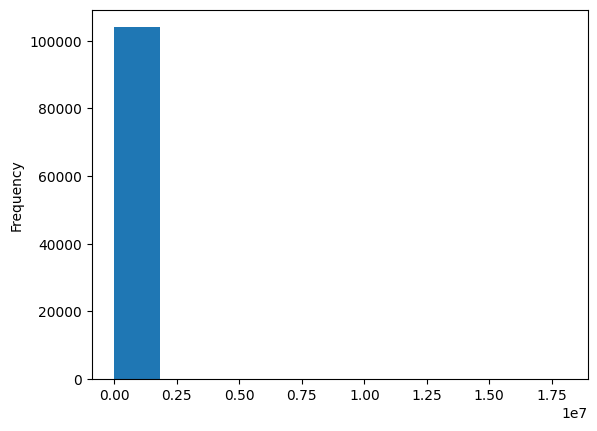

In [505]:
print(transactions_table.groupby('customer_id').grand_total.sum().describe().round())#.quantile([0.25,0.5,0.75]))
transactions_table.groupby('customer_id').grand_total.sum().plot.hist()

* In Grand Total column some orders total value is too high, so checking in 'price' and 'qty_ordered' column for outliers. 

**price column**

count     104064.00
mean       37001.78
std        39602.97
min            1.00
25%         8288.00
50%        24367.00
75%        50063.75
max      1086342.88
Name: price, dtype: float64


<AxesSubplot: title={'center': "Violin Plot for Product's Price"}>

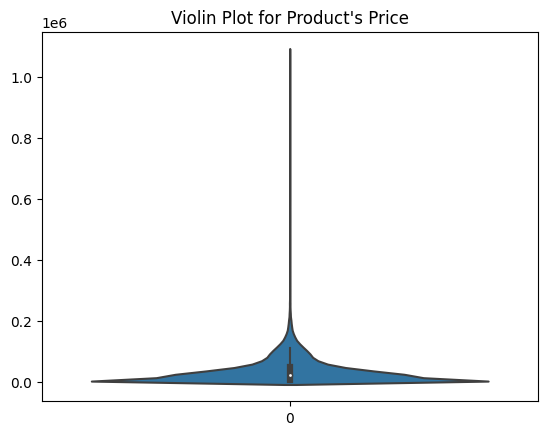

In [506]:
print(transactions_table.groupby('customer_id').price.sum().describe().round(2))
plt.title('Violin Plot for Product\'s Price')
sns.violinplot(transactions_table.groupby('customer_id').price.sum())


Percentile value of top product  330499.0
AxesSubplot(0.125,0.11;0.775x0.77)


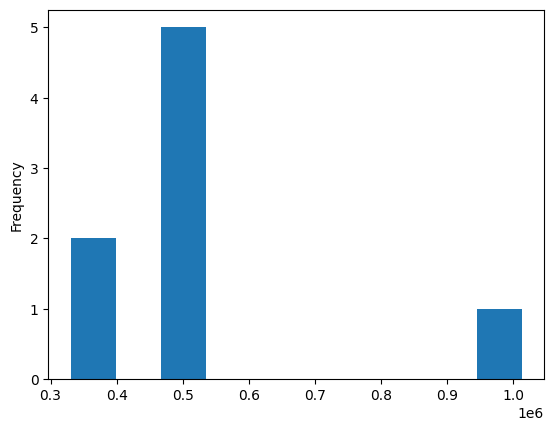

In [507]:
val = np.quantile(transactions_table.price, 0.99999) #Checking for top 0.00001 percent product's price
print('Percentile value of top product ',val)
print(transactions_table[transactions_table.price>=val].price.plot.hist()) #.merge(order_table, how='inner', on='order_id')



In [508]:
val = np.quantile(transactions_table.price, 0.99999)
transactions_table[transactions_table.price>=val].merge(order_table, how='inner', on='order_id')#.groupby('Product_Name').Product_Name.count().sort_values()


,order_id,customer_id_x,TRANS_ID,price,discount_amount,qty_ordered,grand_total,Payment_method,Trans_date,customer_id_y,Product_Name,category_name,order_purchase_date,order_estimated_delivery_date,order_customer_delivery_date,status
0,EKGEXF-1863170,IN-Beta-47094,T0DP14DMD60L6LP,479000.000,0.0,1,479000.000,COD,2019-03-18,IN-Beta-47094,yamaha_EF12000E,Appliances,2019-03-18,2019-07-05,2019-07-08,canceled
1,AKWGST-1467390,IN-Srin-24405,T121XHULD3J3ZGZ,330499.000,0.0,1,330499.000,COD,2020-09-13,IN-Srin-24405,"samsung_SUHD TV? KS 8000 60""",Entertainment,2020-09-13,2020-12-02,2020-12-04,canceled
2,FXBXGM-2274570,IN-Dals-57407,T8PYGJB7QQE7ID5,479000.000,0.0,1,479000.000,Online/Card,2020-08-09,IN-Dals-57407,yamaha_EF12000E,Appliances,2020-08-09,2020-11-03,2020-10-31,canceled
3,KDPIJW-3520352,IN-Barb-47142,TCNESW77CGWMSWY,479000.000,0.0,1,479000.000,Online/Card,2017-03-21,IN-Barb-47142,yamaha_EF12000E,Appliances,2017-03-21,2017-05-30,2017-05-30,order_refunded
4,NVNNII-1035643,IN-Kend-78738,TJH3K8C3SFTP86Z,515975.000,2000.0,1,513975.000,COD,2021-03-17,IN-Kend-78738,ENTSAM59B7C1FA12478,Entertainment,2021-03-17,2021-06-26,2021-06-16,canceled
5,CQYMFK-2075984,IN-Soja-2660,TL6MJ9XQQGKMXY2,1012625.875,0.0,1,1012625.875,COD,2020-10-19,IN-Soja-2660,BAGGEM5A7038AC06C9A,Beauty & Grooming,2020-10-19,2021-01-07,2020-12-29,canceled
6,AREMEC-1097086,IN-Bhay-83761,TTZNT504XVKTXL6,479000.000,0.0,1,479000.000,COD,2014-10-18,IN-Bhay-83761,yamaha_EF12000E,Appliances,2014-10-18,2015-02-12,2015-02-02,canceled
7,YFGYFH-1951138,IN-Srin-58403,TY9C301N9O89OLN,330499.000,0.0,1,330499.000,Online/Card,2020-07-26,IN-Srin-58403,Samsung_60KS8000,Entertainment,2020-07-26,2020-08-11,2020-08-21,canceled


* There are some products whose price are too high, but those are from the Appliance and Entertainment category and it would be possible that these are expensive appliances. 

**qty_ordered column**

count    104064.00
mean         38.66
std         311.50
min           1.00
25%           9.00
50%          17.00
75%          33.00
max       47056.00
Name: qty_ordered, dtype: float64


<AxesSubplot: title={'center': 'Violin Plot of Quantity Ordered'}>

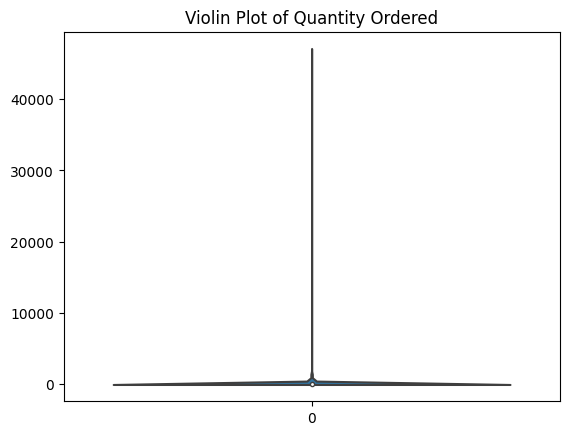

In [509]:
print(transactions_table.groupby('customer_id').qty_ordered.sum().describe().round(2))
plt.title('Violin Plot of Quantity Ordered')
sns.violinplot(transactions_table.groupby('customer_id').qty_ordered.sum())

In [510]:
val = np.quantile(transactions_table.qty_ordered, 0.99999)
transactions_table[transactions_table.qty_ordered>=val]#.merge(order_table, how='inner', on='order_id')#.groupby('Product_Name').Product_Name.count().sort_values()


,order_id,customer_id,TRANS_ID,price,discount_amount,qty_ordered,grand_total,Payment_method,Trans_date
120866,TIEJOX-2414191,IN-Domb-45305,T72WNG8UM2SYQN7,1.0,1650.000000,30743,29093.000000,Online/Card,2021-08-07
128752,JEFJGX-2888854,IN-Saha-50071,T7JSDSI8O9AWF7A,1.0,0.000000,19151,19151.000000,COD,2019-10-28
397198,OHHIIT-2974444,IN-Robe-98741,TN7TPZRF1LAA66H,1.0,0.000000,33041,33041.000000,COD,2014-04-22
537317,VAUQCO-2068280,IN-Alwa-51949,TVFJJA33KKZNCXO,2.0,7627.430176,47039,86450.570312,Online/Card,2014-07-01
557168,RHCKVA-2009899,IN-Akle-46640,TWLT6RCOX2Q5FYL,1.0,0.000000,25901,25901.000000,Online/Card,2014-09-25
576344,WWPUVY-4481779,IN-Peri-31921,TXQEZDN7O1260YE,2.0,0.000000,30526,61052.000000,COD,2019-05-22
600783,FSRRFN-4155906,IN-Gari-50312,TZ5P62N99RSP9SV,1.0,0.000000,31970,31970.000000,COD,2020-08-17


* there are some rows where qty_ordered are too high (e.g. in thousands) but there prices are '1.0' or '2.0', so it is possible that this are small products ordered in bulk.

* Finally, even if some data rows seems to have too big values, but from the data analysis and visualization, it's clear that those products are legit. 
* Hence no need to treat them as outliers or drop them. 

### EDA


**1. customer_table**

In [511]:
customer_table.head()

,name,city,country,customer_id,phn_no
0,Cut Almira Mustofa,Adra,IN,IN-Adra-10096,7367994919
1,Zulaikha Winarsih,Adra,IN,IN-Adra-10127,9995917917
2,Prakosa Waluyo,Adra,IN,IN-Adra-10185,9960047367
3,Yono Marbun,Adra,IN,IN-Adra-10214,6359276388
4,Yani Hidayanto,Adra,IN,IN-Adra-10256,6541966021


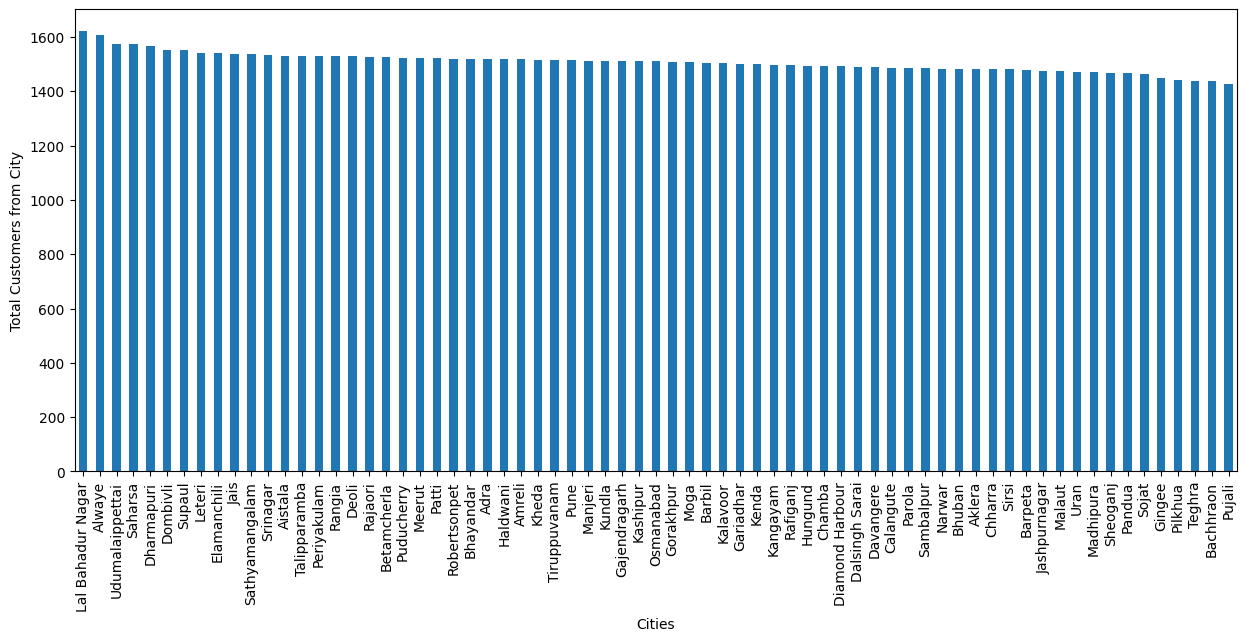

In [512]:
plt.figure(figsize=(15,6))
plt.xlabel('Cities')
plt.xticks(rotation=60)
plt.ylabel('Total Customers from City')
customer_table.city.value_counts().plot.bar()
plt.show()

* Almost all cities have on average equal number of customers 

**2. order_table**

In [513]:
order_table.head()

,order_id,customer_id,Product_Name,category_name,order_purchase_date,order_estimated_delivery_date,order_customer_delivery_date,status
0,AAAAMW-3995324,IN-Akle-93299,AXE_SI-26,Beauty & Grooming,2018-07-19,2018-08-18,2018-08-25,complete
1,AAAANA-4959113,IN-Alwa-4930,WOFMAU5A13EE60B2D63-S,Women's Fashion,2016-03-14,2016-06-07,2016-06-16,order_refunded
2,AAABRP-2231145,IN-Paro-56808,MATSAM59DB75ADB2F80,Mobiles & Tablets,2014-06-21,2014-10-08,2014-10-05,complete
3,AAABWG-4160771,IN-Tiru-53045,dawlance_Reddish DW-115CHZP,Appliances,2015-08-21,2015-10-14,2015-10-24,complete
4,AAACYU-3911274,IN-Elam-97126,APPDAW5A00144E5D452,Appliances,2019-03-03,2019-06-27,2019-06-25,complete


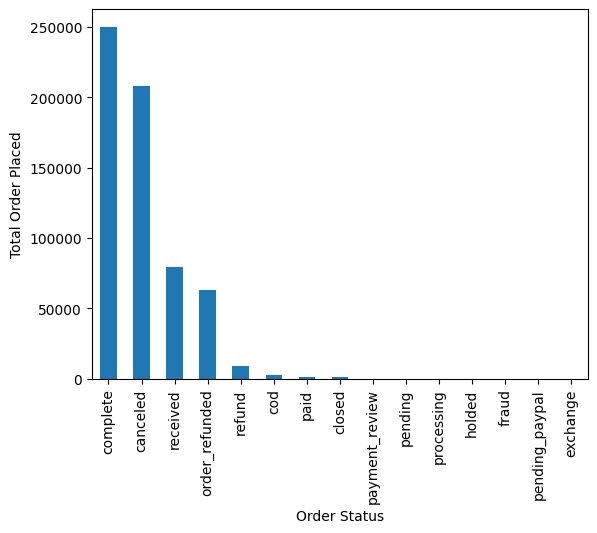

In [520]:
order_table.status.value_counts().plot.bar()
plt.xlabel('Order Status')
plt.ylabel('Total Order Placed')
plt.show()

Checking for any relation between different status 'complete' and 'received' for an order</br>
Checking if order estimated delivery date and actual delivery date is any related to the order status

In [515]:
order_table['delivery_diff'] = (pd.to_datetime(order_table['order_estimated_delivery_date']) - pd.to_datetime(order_table['order_customer_delivery_date'])).dt.days
order_table.head()

,order_id,customer_id,Product_Name,category_name,order_purchase_date,order_estimated_delivery_date,order_customer_delivery_date,status,delivery_diff
0,AAAAMW-3995324,IN-Akle-93299,AXE_SI-26,Beauty & Grooming,2018-07-19,2018-08-18,2018-08-25,complete,-7
1,AAAANA-4959113,IN-Alwa-4930,WOFMAU5A13EE60B2D63-S,Women's Fashion,2016-03-14,2016-06-07,2016-06-16,order_refunded,-9
2,AAABRP-2231145,IN-Paro-56808,MATSAM59DB75ADB2F80,Mobiles & Tablets,2014-06-21,2014-10-08,2014-10-05,complete,3
3,AAABWG-4160771,IN-Tiru-53045,dawlance_Reddish DW-115CHZP,Appliances,2015-08-21,2015-10-14,2015-10-24,complete,-10
4,AAACYU-3911274,IN-Elam-97126,APPDAW5A00144E5D452,Appliances,2019-03-03,2019-06-27,2019-06-25,complete,2


In [521]:
print('For status complete')
order_table[order_table['status']=='complete'].describe()

For status complete


,delivery_diff
count,250103.000000
mean,-0.024550
std,6.049406
min,-10.000000
25%,-5.000000
50%,0.000000
75%,5.000000
max,10.000000


In [522]:
print('For status received')
order_table[order_table['status']=='received'].describe()


For status received


,delivery_diff
count,79459.000000
mean,0.001510
std,6.056051
min,-10.000000
25%,-5.000000
50%,0.000000
75%,5.000000
max,10.000000


* There is no clear relation between order delivery date and order estimated delivery date for order status. 
* both type of order status have estimated and actual delivery date difference ranging from -10 to +10 days
* This means for both type of status orders are arriving early and also late from the expected delivery date

Customers Order Frequency

<AxesSubplot: ylabel='Frequency'>

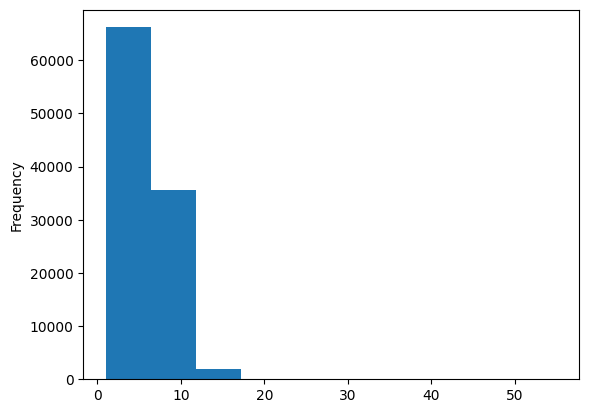

In [394]:
order_table.groupby('customer_id')['order_id'].count().plot.hist()

<AxesSubplot: >

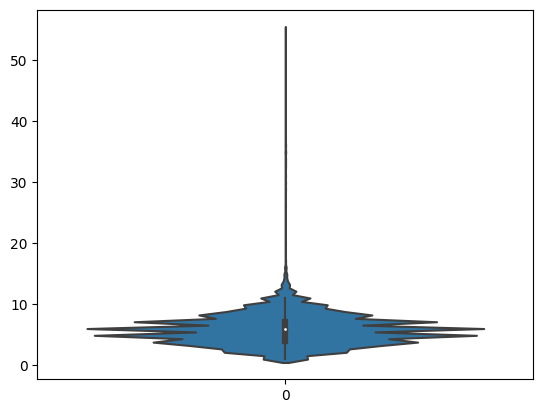

In [395]:
import seaborn as sns
sns.violinplot(order_table.groupby('customer_id')['order_id'].count())

In [526]:
print('Customer\'s order Frequency ')
order_table.groupby('customer_id')['order_id'].count().describe()

Customer's order Frequency 


count    104064.000000
mean          5.910622
std           2.865126
min           1.000000
25%           4.000000
50%           6.000000
75%           7.000000
max          55.000000
Name: order_id, dtype: float64

* From the plot and described dataframe, it is clear that customers usually placed 4-7 orders. 
* Till 75% percentiles people placed less number of order in comparison to the customers who placed orders upto 55. 
* Customers on average placing 6 orders. 

Order Recency Analysis

In [524]:
order_table['recency'] = (pd.to_datetime(date.fromisoformat('2021-12-21')) - pd.to_datetime(order_table['order_purchase_date'])).dt.days


<AxesSubplot: ylabel='Frequency'>

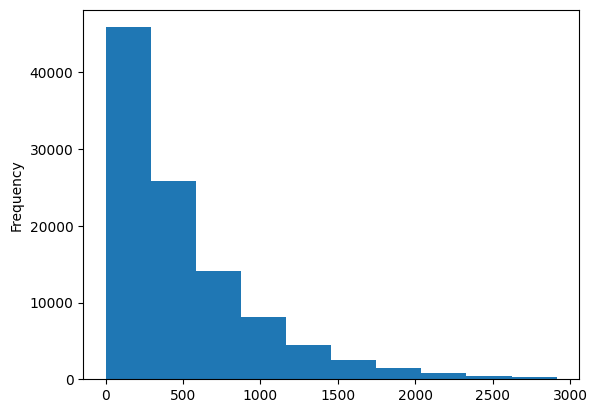

In [525]:
order_table.groupby('customer_id')['recency'].min().plot.hist()

<AxesSubplot: >

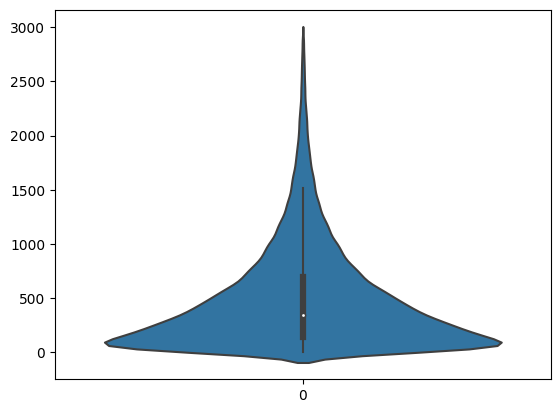

In [399]:
sns.violinplot(order_table.groupby('customer_id')['recency'].min()) 


* Recency distribution is right tailed, it means most of the last order placed by customers are in recent time.
* With increasing time (recency decreasing), number of customer is also decreasing. So there are few number of customers who haven't placed any order in a very long time. 

In [400]:
# # sns.violinplot(order_table.groupby('customer_id')['recency'].min()) 
# x = order_table.groupby('customer_id')['recency'].min()
# q1,q3 = np.quantile(x, [0.25,0.75])
# sns.violinplot(x.loc[(x>q1) & (x<q3)])

**3. transactions_table**

In [401]:
transactions_table.head()

,order_id,customer_id,TRANS_ID,price,discount_amount,qty_ordered,grand_total,Payment_method,Trans_date
0,LTPLOU-2389083,IN-Madh-66468,T0001DYQD0HHUBC,799.0,182.215805,2,1415.784180,Online/Card,2017-12-12
1,IHKOKM-2112423,IN-Sirs-52279,T0002NV8P6FV0UU,150.0,0.000000,1,150.000000,COD,2014-03-01
2,XWGEEO-2016907,IN-Dhar-21003,T00044VVX778WE8,8000.0,1000.000000,2,15000.000000,COD,2017-01-19
3,TWGNDX-3940026,IN-Aist-62197,T0008EQVNKBMD6T,699.0,0.000000,2,1398.000000,COD,2016-08-23
4,DGHAGM-4122969,IN-Manj-51104,T00099X49XTK3LO,13698.0,2109.899902,1,11588.099609,Online/Card,2018-08-24


Payment_method
COD            2.626754e+09
Online/Card    2.621034e+09
Name: grand_total, dtype: float64


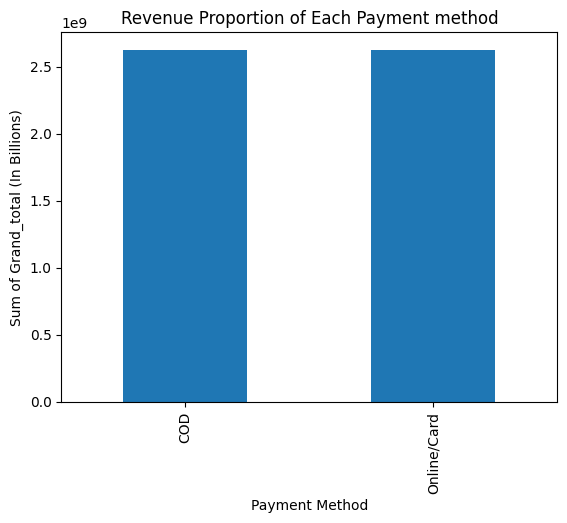

In [527]:
print(transactions_table.groupby('Payment_method').grand_total.sum())
transactions_table.groupby('Payment_method').grand_total.sum().plot.bar()
plt.xlabel('Payment Method')
plt.ylabel('Sum of Grand_total (In Billions)')
plt.title('Revenue Proportion of Each Payment method')
plt.show()

* Both payment method have approximately same average sales. 

### Merging Datasets

In [403]:
campaign_data.head()                     

,customer_id,treatment,conversion,visit,exposure,class
0,IN-Hung-15894,1,0,0,0,Lost Cause
1,IN-Jais-17512,1,0,0,0,Lost Cause
2,IN-Akle-17369,1,0,0,0,Lost Cause
3,IN-Deol-71539,1,0,0,0,Lost Cause
4,IN-Puja-7705,1,0,0,0,Lost Cause


In [404]:
# Dropping unnecessary column from customer dataframe
customer_table.drop(['name','country','phn_no'],axis=1,inplace=True)


merging campaing_data and customer_table data 

In [405]:
df1 = campaign_data.merge(customer_table, how='inner', on='customer_id')
df1.head()

,customer_id,treatment,conversion,visit,exposure,class,city
0,IN-Hung-15894,1,0,0,0,Lost Cause,Hungund
1,IN-Jais-17512,1,0,0,0,Lost Cause,Jais
2,IN-Akle-17369,1,0,0,0,Lost Cause,Aklera
3,IN-Deol-71539,1,0,0,0,Lost Cause,Deoli
4,IN-Puja-7705,1,0,0,0,Lost Cause,Pujali


In [406]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104064 entries, 0 to 104063
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  104064 non-null  object
 1   treatment    104064 non-null  int64 
 2   conversion   104064 non-null  int64 
 3   visit        104064 non-null  int64 
 4   exposure     104064 non-null  int64 
 5   class        104064 non-null  object
 6   city         104064 non-null  object
dtypes: int64(4), object(3)
memory usage: 6.4+ MB


Merging product order details data and transactions data

In [407]:
order_table.head()

,order_id,customer_id,Product_Name,category_name,order_purchase_date,order_estimated_delivery_date,order_customer_delivery_date,status,delivery_diff,recency
0,AAAAMW-3995324,IN-Akle-93299,AXE_SI-26,Beauty & Grooming,2018-07-19,2018-08-18,2018-08-25,complete,-7,1251
1,AAAANA-4959113,IN-Alwa-4930,WOFMAU5A13EE60B2D63-S,Women's Fashion,2016-03-14,2016-06-07,2016-06-16,order_refunded,-9,2108
2,AAABRP-2231145,IN-Paro-56808,MATSAM59DB75ADB2F80,Mobiles & Tablets,2014-06-21,2014-10-08,2014-10-05,complete,3,2740
3,AAABWG-4160771,IN-Tiru-53045,dawlance_Reddish DW-115CHZP,Appliances,2015-08-21,2015-10-14,2015-10-24,complete,-10,2314
4,AAACYU-3911274,IN-Elam-97126,APPDAW5A00144E5D452,Appliances,2019-03-03,2019-06-27,2019-06-25,complete,2,1024


In [408]:
df2 = order_table.merge(transactions_table, how='inner',on='order_id', )
df2.head()

,order_id,customer_id_x,Product_Name,category_name,order_purchase_date,order_estimated_delivery_date,order_customer_delivery_date,status,delivery_diff,recency,customer_id_y,TRANS_ID,price,discount_amount,qty_ordered,grand_total,Payment_method,Trans_date
0,AAAAMW-3995324,IN-Akle-93299,AXE_SI-26,Beauty & Grooming,2018-07-19,2018-08-18,2018-08-25,complete,-7,1251,IN-Akle-93299,TOATP79SKO0RF8B,265.0,0.000000,5,1325.000000,Online/Card,2018-07-19
1,AAAANA-4959113,IN-Alwa-4930,WOFMAU5A13EE60B2D63-S,Women's Fashion,2016-03-14,2016-06-07,2016-06-16,order_refunded,-9,2108,IN-Alwa-4930,TG94DLM6143INBM,1312.5,0.000000,1,1312.500000,COD,2016-03-14
2,AAABRP-2231145,IN-Paro-56808,MATSAM59DB75ADB2F80,Mobiles & Tablets,2014-06-21,2014-10-08,2014-10-05,complete,3,2740,IN-Paro-56808,TDJX89X20T7S2R4,14000.0,2800.000000,1,11200.000000,Online/Card,2014-06-21
3,AAABWG-4160771,IN-Tiru-53045,dawlance_Reddish DW-115CHZP,Appliances,2015-08-21,2015-10-14,2015-10-24,complete,-10,2314,IN-Tiru-53045,TPSULBR3239EBY0,11359.0,0.000000,1,11359.000000,COD,2015-08-21
4,AAACYU-3911274,IN-Elam-97126,APPDAW5A00144E5D452,Appliances,2019-03-03,2019-06-27,2019-06-25,complete,2,1024,IN-Elam-97126,T9E2OK47XXS9XD4,4999.0,769.900024,1,4229.100098,COD,2019-03-03


In [409]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615083 entries, 0 to 615082
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       615083 non-null  object 
 1   customer_id_x                  615083 non-null  object 
 2   Product_Name                   615083 non-null  object 
 3   category_name                  615083 non-null  object 
 4   order_purchase_date            615083 non-null  object 
 5   order_estimated_delivery_date  615083 non-null  object 
 6   order_customer_delivery_date   615083 non-null  object 
 7   status                         615083 non-null  object 
 8   delivery_diff                  615083 non-null  int64  
 9   recency                        615083 non-null  int64  
 10  customer_id_y                  615083 non-null  object 
 11  TRANS_ID                       615083 non-null  object 
 12  price                         

* After merging there are two same column 'customer_id_x' and 'customer_id_y', so dropping one and renaming other without '_x' or '_y'


In [410]:
df2.drop('customer_id_y',axis=1,inplace=True) 
df2.rename(columns={'customer_id_x':'customer_id'}, inplace=True)
df2.head()

,order_id,customer_id,Product_Name,category_name,order_purchase_date,order_estimated_delivery_date,order_customer_delivery_date,status,delivery_diff,recency,TRANS_ID,price,discount_amount,qty_ordered,grand_total,Payment_method,Trans_date
0,AAAAMW-3995324,IN-Akle-93299,AXE_SI-26,Beauty & Grooming,2018-07-19,2018-08-18,2018-08-25,complete,-7,1251,TOATP79SKO0RF8B,265.0,0.000000,5,1325.000000,Online/Card,2018-07-19
1,AAAANA-4959113,IN-Alwa-4930,WOFMAU5A13EE60B2D63-S,Women's Fashion,2016-03-14,2016-06-07,2016-06-16,order_refunded,-9,2108,TG94DLM6143INBM,1312.5,0.000000,1,1312.500000,COD,2016-03-14
2,AAABRP-2231145,IN-Paro-56808,MATSAM59DB75ADB2F80,Mobiles & Tablets,2014-06-21,2014-10-08,2014-10-05,complete,3,2740,TDJX89X20T7S2R4,14000.0,2800.000000,1,11200.000000,Online/Card,2014-06-21
3,AAABWG-4160771,IN-Tiru-53045,dawlance_Reddish DW-115CHZP,Appliances,2015-08-21,2015-10-14,2015-10-24,complete,-10,2314,TPSULBR3239EBY0,11359.0,0.000000,1,11359.000000,COD,2015-08-21
4,AAACYU-3911274,IN-Elam-97126,APPDAW5A00144E5D452,Appliances,2019-03-03,2019-06-27,2019-06-25,complete,2,1024,T9E2OK47XXS9XD4,4999.0,769.900024,1,4229.100098,COD,2019-03-03


#### Questions for querying 
1. What is the grand_total for each status type?

            status percentage
0         canceled   56.7047%
1         complete   24.4659%
2   order_refunded    8.8251%
3         received    8.7137%
4           refund    0.6628%
5              cod    0.2524%
6             paid    0.1696%
7           closed    0.1041%
8       processing    0.0395%
9          pending    0.0239%
10          holded    0.0222%
11           fraud    0.0119%
12  payment_review     0.004%
13  pending_paypal    0.0002%
14        exchange    0.0001%


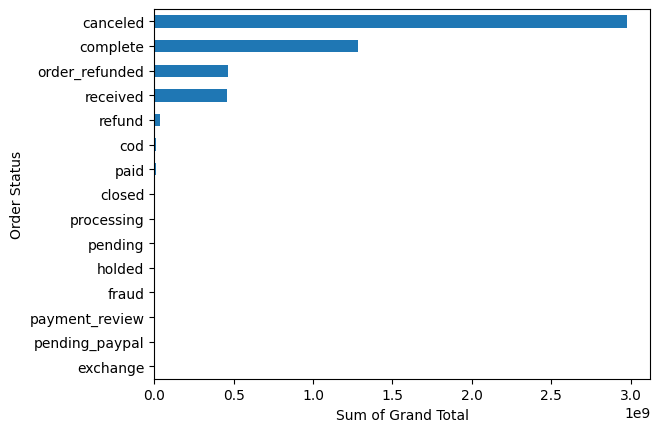

In [528]:
x = df2.groupby('status').grand_total.sum().sort_values(ascending=False).reset_index()
x['percentage'] = list(map(lambda x: str(x)+'%', round((x.grand_total/x.grand_total.sum())*100,4)))
print(x[['status','percentage']])
df2.groupby('status').grand_total.sum().sort_values().plot.barh()
plt.ylabel('Order Status')
plt.xlabel('Sum of Grand Total')
plt.show()

Points: 
* More than half of revenue (~57%) is from the 'canceled' orders
* Around 9% of revenue is refunded (order_refunded, refund)
* Only approx 25% of orders is completed, and around 9% of order status is received

2. For each category what are the sum of grand_total?

         category_name percentage
0    Mobiles & Tablets   49.1255%
1           Appliances   12.9853%
2        Entertainment   10.7013%
3      Women's Fashion    5.9175%
4               Others    4.4371%
5            Computing    3.9839%
6        Men's Fashion    3.9137%
7           Superstore    2.1721%
8    Beauty & Grooming    2.0047%
9        Home & Living     1.834%
10         Kids & Baby    0.9774%
11             Soghaat    0.9178%
12     Health & Sports    0.8272%
13  School & Education    0.1208%
14               Books    0.0817%


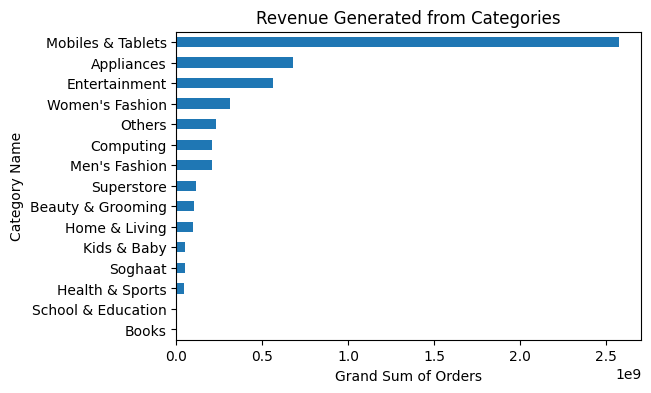

In [450]:
x = df2.groupby('category_name').grand_total.sum().sort_values(ascending=False).reset_index()
x['percentage'] = list(map(lambda x: str(x)+'%', round((x.grand_total/x.grand_total.sum())*100,4)))
print(x[['category_name','percentage']])
plt.figure(figsize=(6,4))
df2.groupby('category_name').grand_total.sum().sort_values().plot.barh()
plt.xlabel('Grand Sum of Orders')
plt.ylabel('Category Name')
plt.title('Revenue Generated from Categories')
plt.show()

Points: 
* Half of the revenue (considering all order status type) is generated from the 'Mobiles & Tablets' category
* On second and third position respectively 'Appliance' and 'Entertainment' category is positioned with 13% and 11% of total_revenue


3. For Each category what is the Total Order placed and Revenue generated via different Payment methods?

<AxesSubplot: title={'center': 'Online Vs COD Total Orders'}, xlabel='count', ylabel='category_name'>

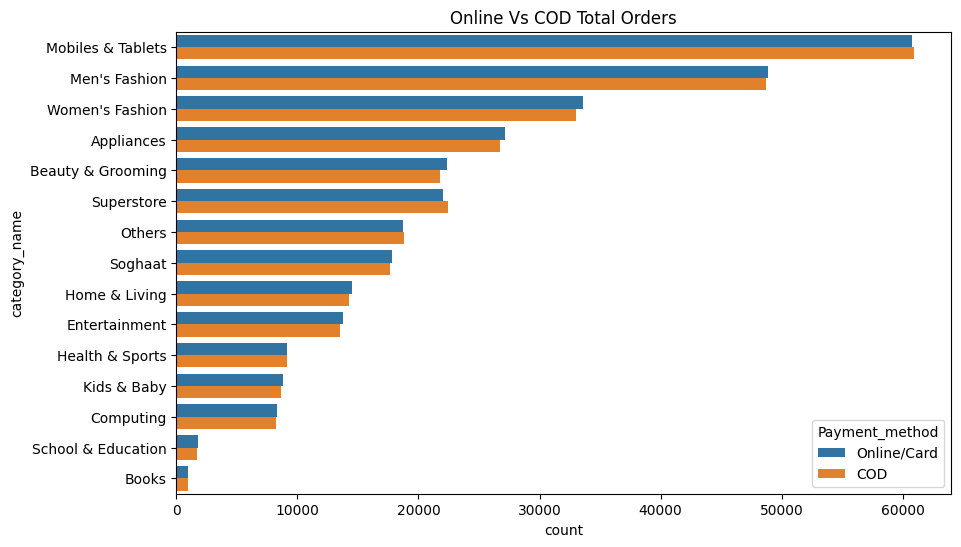

In [413]:
x = df2.groupby(['Payment_method', 'category_name']).order_id.count().reset_index(name='count').sort_values(by=['Payment_method','count'],  ascending=False)
plt.figure(figsize=(10,6))
plt.title('Online Vs COD Total Orders')
sns.barplot(hue='Payment_method',x='count',y='category_name', data=x)



Points:
* For each category, total order placed is almost equal.
* For both type of Payment_method, 'Mobiles & Tablets' category is top selling category

<AxesSubplot: title={'center': 'Online Vs COD Total Revenue'}, xlabel='revenue', ylabel='category_name'>

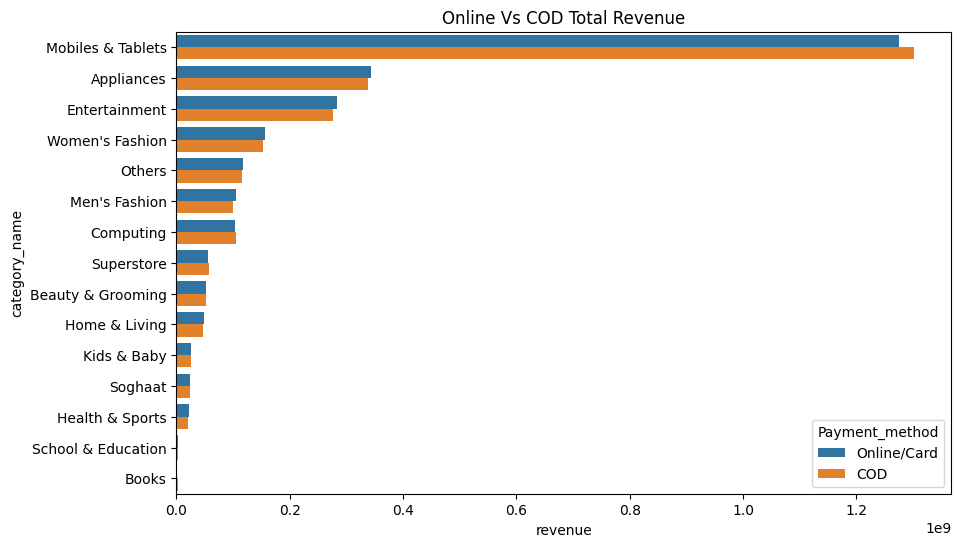

In [414]:
x = df2.groupby(['Payment_method', 'category_name']).grand_total.sum().reset_index(name='revenue').sort_values(by=['Payment_method','revenue'],  ascending=False)
plt.figure(figsize=(10,6))
plt.title('Online Vs COD Total Revenue')
sns.barplot(hue='Payment_method',x='revenue',y='category_name', data=x)



Points: 
* For both type of payment method, each category also generating same type of revenue


4. What are the total order status for each payment mode?

   Payment_method          status   count
18    Online/Card        complete  125144
15    Online/Card        canceled  104604
28    Online/Card        received   40028
22    Online/Card  order_refunded   31890
29    Online/Card          refund    4388
17    Online/Card             cod    1410
23    Online/Card            paid     568
16    Online/Card          closed     539
21    Online/Card          holded      22
25    Online/Card         pending      21
27    Online/Card      processing      18
24    Online/Card  payment_review      15
20    Online/Card           fraud       6
26    Online/Card  pending_paypal       4
19    Online/Card        exchange       1
3             COD        complete  124959
0             COD        canceled  103537
13            COD        received   39431
7             COD  order_refunded   31460
14            COD          refund    4362
2             COD             cod    1449
8             COD            paid     591
1             COD          closed 

<AxesSubplot: title={'center': 'Online Vs COD Orders Status'}, xlabel='count', ylabel='status'>

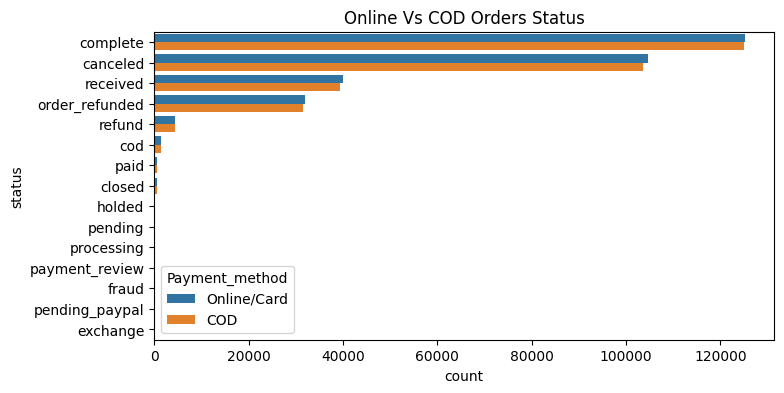

In [447]:
x = df2.groupby(['Payment_method','status']).status.count().reset_index(name='count').sort_values(by=['Payment_method','count'],  ascending=False)
print(x)
plt.figure(figsize=(8,4))
plt.title('Online Vs COD Orders Status')
sns.barplot(y='status',x='count',hue='Payment_method', data=x)



* For Each type of payment method, on average it's same number of order placed for every type of order status

Testing using only successfully revenue generated order status

In [415]:
# l = ['complete', 'received', 'cod', 'paid', 'closed', 'exchange']
# df3 = df2[df2.status.isin(l)]

# x = df3.groupby(['Payment_method', 'category_name']).grand_total.sum().reset_index(name='revenue').sort_values(by=['Payment_method','revenue'],  ascending=False)
# plt.figure(figsize=(10,6))
# plt.title('Online Vs COD Total Revenue')
# sns.barplot(hue='Payment_method',x='revenue',y='category_name', data=x)

# x = df3.groupby(['Payment_method', 'category_name']).order_id.count().reset_index(name='count').sort_values(by=['Payment_method','count'],  ascending=False)
# plt.figure(figsize=(10,6))
# plt.title('Online Vs COD Total Orders')
# sns.barplot(hue='Payment_method',x='count',y='category_name', data=x)




#### Finally Merging all dataframes 

In [416]:

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615083 entries, 0 to 615082
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       615083 non-null  object 
 1   customer_id                    615083 non-null  object 
 2   Product_Name                   615083 non-null  object 
 3   category_name                  615083 non-null  object 
 4   order_purchase_date            615083 non-null  object 
 5   order_estimated_delivery_date  615083 non-null  object 
 6   order_customer_delivery_date   615083 non-null  object 
 7   status                         615083 non-null  object 
 8   delivery_diff                  615083 non-null  int64  
 9   recency                        615083 non-null  int64  
 10  TRANS_ID                       615083 non-null  object 
 11  price                          615083 non-null  float64
 12  discount_amount               

In [417]:
model_df = df2.merge(df1, how='left', on='customer_id')
model_df.head(10)

,order_id,customer_id,Product_Name,category_name,order_purchase_date,order_estimated_delivery_date,order_customer_delivery_date,status,delivery_diff,recency,TRANS_ID,price,discount_amount,qty_ordered,grand_total,Payment_method,Trans_date,treatment,conversion,visit,exposure,class,city
0,AAAAMW-3995324,IN-Akle-93299,AXE_SI-26,Beauty & Grooming,2018-07-19,2018-08-18,2018-08-25,complete,-7,1251,TOATP79SKO0RF8B,265.0,0.000000,5,1325.000000,Online/Card,2018-07-19,0,0,0,0,Lost Cause,Aklera
1,AAAANA-4959113,IN-Alwa-4930,WOFMAU5A13EE60B2D63-S,Women's Fashion,2016-03-14,2016-06-07,2016-06-16,order_refunded,-9,2108,TG94DLM6143INBM,1312.5,0.000000,1,1312.500000,COD,2016-03-14,1,0,0,0,Lost Cause,Alwaye
2,AAABRP-2231145,IN-Paro-56808,MATSAM59DB75ADB2F80,Mobiles & Tablets,2014-06-21,2014-10-08,2014-10-05,complete,3,2740,TDJX89X20T7S2R4,14000.0,2800.000000,1,11200.000000,Online/Card,2014-06-21,1,0,0,0,Lost Cause,Parola
3,AAABWG-4160771,IN-Tiru-53045,dawlance_Reddish DW-115CHZP,Appliances,2015-08-21,2015-10-14,2015-10-24,complete,-10,2314,TPSULBR3239EBY0,11359.0,0.000000,1,11359.000000,COD,2015-08-21,1,0,0,0,Lost Cause,Tiruppuvanam
4,AAACYU-3911274,IN-Elam-97126,APPDAW5A00144E5D452,Appliances,2019-03-03,2019-06-27,2019-06-25,complete,2,1024,T9E2OK47XXS9XD4,4999.0,769.900024,1,4229.100098,COD,2019-03-03,0,0,0,0,Lost Cause,Elamanchili
5,AAADUQ-4244583,IN-Ging-90985,APPDAW5AF036E2E8E92,Appliances,2021-10-16,2022-01-23,2022-01-16,canceled,7,66,T3C2ZEFWGXVTWI2,54737.0,4926.330078,1,49810.671875,Online/Card,2021-10-16,1,0,0,0,Dont Disturb,Gingee
6,AAAFFH-1236473,IN-Robe-5446,BAGJUN59C10DC6C5B9A,Beauty & Grooming,2014-12-07,2015-01-30,2015-02-05,complete,-6,2571,TLCEDUE9XWM3TX0,582.0,86.273300,10,5733.726562,COD,2014-12-07,1,0,0,0,Lost Cause,Robertsonpet
7,AAAFSK-2004105,IN-Narw-3875,Infinix Note 3-3 GB-Gold,Mobiles & Tablets,2020-12-24,2021-03-16,2021-03-06,canceled,10,362,TG5TDOMX6LD0COE,20599.0,0.000000,1,20599.000000,COD,2020-12-24,0,0,0,0,Lost Cause,Narwar
8,AAAHKD-4715002,IN-Manj-99471,MATLEN59B7EABC4FF81,Mobiles & Tablets,2017-08-10,2017-12-30,2017-12-23,complete,7,1594,T7V7V54EHRJRAN2,11856.0,3000.000000,1,8856.000000,Online/Card,2017-08-10,0,0,0,0,Lost Cause,Manjeri
9,AAAMDN-4210011,IN-Pand-59870,MATSAM59DB75ADB2F80,Mobiles & Tablets,2021-05-03,2021-08-17,2021-08-10,canceled,7,232,TYEXIBJYQSWDXEY,13698.0,2269.800049,1,11428.200195,Online/Card,2021-05-03,1,0,0,0,Lost Cause,Pandua


In [418]:
model_df.isnull().sum()

order_id                         0
customer_id                      0
Product_Name                     0
category_name                    0
order_purchase_date              0
order_estimated_delivery_date    0
order_customer_delivery_date     0
status                           0
delivery_diff                    0
recency                          0
TRANS_ID                         0
price                            0
discount_amount                  0
qty_ordered                      0
grand_total                      0
Payment_method                   0
Trans_date                       0
treatment                        0
conversion                       0
visit                            0
exposure                         0
class                            0
city                             0
dtype: int64

In [419]:
# Saving merged raw dataframe to csv files
# df1.to_csv('df1.csv', index=False)
# df2.to_csv('df2.csv', index=False)
# model_df.to_csv('model_df.csv', index=False)

df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')
model_df = pd.read_csv('model_df.csv')


In [420]:
model_df.head()


,order_id,customer_id,Product_Name,category_name,order_purchase_date,order_estimated_delivery_date,order_customer_delivery_date,status,delivery_diff,recency,TRANS_ID,price,discount_amount,qty_ordered,grand_total,Payment_method,Trans_date,treatment,conversion,visit,exposure,class,city
0,AAAAMW-3995324,IN-Akle-93299,AXE_SI-26,Beauty & Grooming,2018-07-19,2018-08-18,2018-08-25,complete,-7,1251,TOATP79SKO0RF8B,265.0,0.000000,5,1325.000000,Online/Card,2018-07-19,0,0,0,0,Lost Cause,Aklera
1,AAAANA-4959113,IN-Alwa-4930,WOFMAU5A13EE60B2D63-S,Women's Fashion,2016-03-14,2016-06-07,2016-06-16,order_refunded,-9,2108,TG94DLM6143INBM,1312.5,0.000000,1,1312.500000,COD,2016-03-14,1,0,0,0,Lost Cause,Alwaye
2,AAABRP-2231145,IN-Paro-56808,MATSAM59DB75ADB2F80,Mobiles & Tablets,2014-06-21,2014-10-08,2014-10-05,complete,3,2740,TDJX89X20T7S2R4,14000.0,2800.000000,1,11200.000000,Online/Card,2014-06-21,1,0,0,0,Lost Cause,Parola
3,AAABWG-4160771,IN-Tiru-53045,dawlance_Reddish DW-115CHZP,Appliances,2015-08-21,2015-10-14,2015-10-24,complete,-10,2314,TPSULBR3239EBY0,11359.0,0.000000,1,11359.000000,COD,2015-08-21,1,0,0,0,Lost Cause,Tiruppuvanam
4,AAACYU-3911274,IN-Elam-97126,APPDAW5A00144E5D452,Appliances,2019-03-03,2019-06-27,2019-06-25,complete,2,1024,T9E2OK47XXS9XD4,4999.0,769.900024,1,4229.100098,COD,2019-03-03,0,0,0,0,Lost Cause,Elamanchili


In [421]:
# from sklearn.preprocessing import LabelEncoder

# # Create a LabelEncoder object
# encoder = LabelEncoder()


# Fit the encoder to the category data and transform it
# model_df['category_name'] = encoder.fit_transform(model_df['category_name'])

# Fit the encoder to the status data and transform it
# model_df['status'] = encoder.fit_transform(model_df['status'])

# Fit the encoder to the Payment method data and transform it
# model_df['Payment_method'] = encoder.fit_transform(model_df['Payment_method'])

# Fit the encoder to the class method data and transform it
# model_df['class'] = encoder.fit_transform(model_df['class'])

# Fit the encoder to the cities data and transform it
# model_df['city'] = encoder.fit_transform(model_df['city'])


In [422]:
# df = model_df[['category_name', 'status','delivery_diff','recency','grand_total','Payment_method','city','treatment','visit','exposure']]
# treatment = model_df['treatment']
# conversion = model_df['conversion']
# visit = model_df['visit']
# exposure = model_df['exposure']
# customer_class = model_df['class']

In [423]:
grouped_df2 = df2.groupby('customer_id').agg({'order_id':'count',
                                'recency':'min',
                                'grand_total':'sum',  
                                'delivery_diff':'median',
                            }).reset_index()
grouped_df2.rename(columns={'order_id':'total_orders'}, inplace=True)
grouped_df2.head()


,customer_id,total_orders,recency,grand_total,delivery_diff
0,IN-Adra-10096,5,1124,17655.400024,-2.0
1,IN-Adra-10127,10,58,124299.899902,-2.0
2,IN-Adra-10185,4,926,85880.000000,-5.0
3,IN-Adra-10214,4,543,77188.399994,-0.5
4,IN-Adra-10256,2,430,1694.000000,-1.5


In [424]:
df1.shape, grouped_df2.shape

((104064, 7), (104064, 5))

In [425]:
df = df1.merge(grouped_df2, on='customer_id', how='inner')

In [426]:
pd.set_option('display.max_columns',None)
df.head()


,customer_id,treatment,conversion,visit,exposure,class,city,total_orders,recency,grand_total,delivery_diff
0,IN-Hung-15894,1,0,0,0,Lost Cause,Hungund,5,1123,62958.289062,4.0
1,IN-Jais-17512,1,0,0,0,Lost Cause,Jais,5,608,62417.000000,1.0
2,IN-Akle-17369,1,0,0,0,Lost Cause,Aklera,8,278,14209.049988,1.5
3,IN-Deol-71539,1,0,0,0,Lost Cause,Deoli,11,119,112006.499969,4.0
4,IN-Puja-7705,1,0,0,0,Lost Cause,Pujali,2,1037,10490.000000,1.5


In [427]:
# # Saving merged dataframe to csv file 
# df.to_csv('df.csv',index=False)

In [529]:
df = pd.read_csv('df.csv')
df.head()

,customer_id,treatment,conversion,visit,exposure,class,city,total_orders,recency,grand_total,delivery_diff
0,IN-Hung-15894,1,0,0,0,Lost Cause,Hungund,5,1123,62958.289062,4.0
1,IN-Jais-17512,1,0,0,0,Lost Cause,Jais,5,608,62417.000000,1.0
2,IN-Akle-17369,1,0,0,0,Lost Cause,Aklera,8,278,14209.049988,1.5
3,IN-Deol-71539,1,0,0,0,Lost Cause,Deoli,11,119,112006.499969,4.0
4,IN-Puja-7705,1,0,0,0,Lost Cause,Pujali,2,1037,10490.000000,1.5


### RFM Analysis

In [530]:
df['recency_score'] = df['recency'].rank(pct=True, ascending=False, method='max')
df['frequency_score'] = df['total_orders'].rank(pct=True, method='max')
df['monetary_score'] = df['grand_total'].rank(pct=True, method='max')

df['score'] = (df['recency_score']+ df['frequency_score']+ df['monetary_score'])/3
df.head()

# On the basis of score, segmenting customers to differnt bucket groups
customer_segmentation = np.linspace(0,1,5)
df['customer_segment'] = pd.cut(df['score'], customer_segmentation)
df.head()



,customer_id,treatment,conversion,visit,exposure,class,city,total_orders,recency,grand_total,delivery_diff,recency_score,frequency_score,monetary_score,score,customer_segment
0,IN-Hung-15894,1,0,0,0,Lost Cause,Hungund,5,1123,62958.289062,4.0,0.105176,0.476908,0.746867,0.442984,"(0.25, 0.5]"
1,IN-Jais-17512,1,0,0,0,Lost Cause,Jais,5,608,62417.000000,1.0,0.294511,0.476908,0.744225,0.505215,"(0.5, 0.75]"
2,IN-Akle-17369,1,0,0,0,Lost Cause,Aklera,8,278,14209.049988,1.5,0.574531,0.861835,0.234817,0.557061,"(0.5, 0.75]"
3,IN-Deol-71539,1,0,0,0,Lost Cause,Deoli,11,119,112006.499969,4.0,0.789216,0.978331,0.905760,0.891102,"(0.75, 1.0]"
4,IN-Puja-7705,1,0,0,0,Lost Cause,Pujali,2,1037,10490.000000,1.5,0.125010,0.069573,0.172682,0.122421,"(0.0, 0.25]"


In [539]:
x= df.groupby('customer_segment').customer_id.count().reset_index(name='count')
x['precentage'] = x['count']*100/x['count'].sum()
x

,customer_segment,count,precentage
0,"(0.0, 0.25]",13482,12.955489
1,"(0.25, 0.5]",33030,31.740083
2,"(0.5, 0.75]",41051,39.447840
3,"(0.75, 1.0]",16501,15.856588


* Above 0.75 RFM Score include around 16% of customer population 
* Business want to focus more on this segment, it would generate more revenue

In [430]:
# df_filtered = df[df.recency<np.percentile(df.recency,75)]
# df_filtered = df_filtered[df_filtered.total_orders<np.percentile(df_filtered.total_orders, 99.5)]
# df_filtered = df_filtered[df_filtered.grand_total<np.percentile(df_filtered.grand_total, 95)]
# df_filtered.head()

# df_filtered['recency_score'] = df_filtered['recency'].rank(pct=True, ascending=False, method='max')
# df_filtered['frequency_score'] = df_filtered['total_orders'].rank(pct=True, method='max')
# df_filtered['monetary_score'] = df_filtered['grand_total'].rank(pct=True, method='max')

# df_filtered['score'] = (df_filtered['recency_score']*0.2+ df_filtered['frequency_score']*0.3+ df_filtered['monetary_score']*0.4)
# df_filtered.head()

## Modelling 

In [431]:
# df.drop(['customer_id','class','city','recency_score','frequency_score','monetary_score'],axis=1, inplace=True)
df.drop(['customer_id','class','city'],axis=1, inplace=True)
df.head()

,treatment,conversion,visit,exposure,total_orders,recency,grand_total,delivery_diff
0,1,0,0,0,5,1123,62958.289062,4.0
1,1,0,0,0,5,608,62417.000000,1.0
2,1,0,0,0,8,278,14209.049988,1.5
3,1,0,0,0,11,119,112006.499969,4.0
4,1,0,0,0,2,1037,10490.000000,1.5


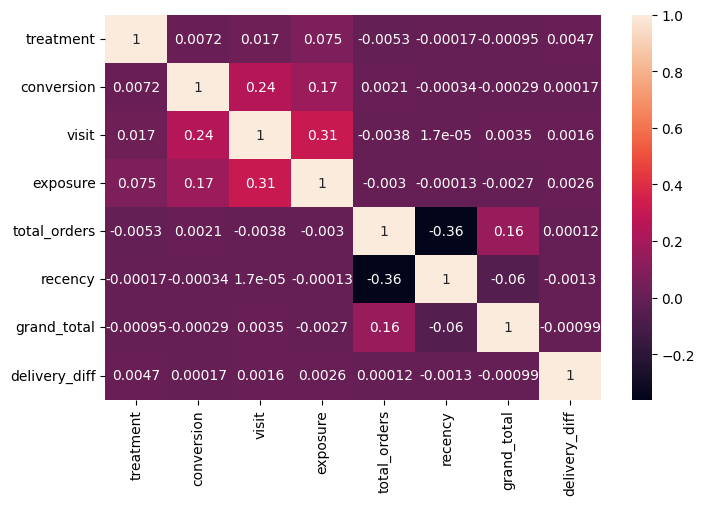

In [485]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

* Correlation Heat map showing that Recency and total_orders have high negative score (-0.36), Recency is negatively correlated, which is right. Because if recency increase then total orders decrease
* Visit and exposure showing high correlation 

In [432]:
## Setting Up Fix Random seed
random_seed = 157

In [433]:
# Creating treatment and control group data
treatment_gp = df[df.treatment==1]
control_gp = df[df.treatment==0]


In [590]:
x = campaign_data.groupby(['treatment','conversion']).conversion.count().reset_index(name='customer_count')
print(x)
print('\n')
print("Treatment Conversion Rate: ", (x[(x.treatment==1)&(x.conversion==1)].customer_count*100/x[x.treatment==1].customer_count.sum()).item())
print("Control Conversion Rate: ", (x[(x.treatment==0)&(x.conversion==1)].customer_count*100/x[x.treatment==0].customer_count.sum()).item())

# (x[(x.treatment==1)&(x.conversion==1)].customer_count*100/x[x.treatment==1].customer_count.sum()).item()

   treatment  conversion  customer_count
0          0           0           15569
1          0           1              31
2          1           0           88192
3          1           1             272


Treatment Conversion Rate:  0.30746970519081207
Control Conversion Rate:  0.1987179487179487


In [188]:
treatment_gp.shape, control_gp.shape, df.shape

((88464, 8), (15600, 8), (104064, 8))

In [292]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the treatment data into training and testing sets
X_treatment = treatment_gp.drop(['treatment', 'conversion'], axis=1)
y_treatment = treatment_gp['conversion']
X_treatment_train, X_treatment_test, y_treatment_train, y_treatment_test = train_test_split(X_treatment, y_treatment, test_size=0.25, random_state=random_seed)

# Split the control data into training and testing sets
X_control = control_gp.drop(['treatment', 'conversion'], axis=1)
y_control = control_gp['conversion']
X_control_train, X_control_test, y_control_train, y_control_test = train_test_split(X_control, y_control, test_size=0.2, random_state=random_seed)

# Build and train the treatment model
print('Fitting Target Group data to Random Forest Classifier')
treatment_model = RandomForestClassifier(verbose=True)
treatment_model.fit(X_treatment_train, y_treatment_train)

# Build and train the control model
print('Fitting Control Group data to Random Forest Classifier')
control_model = RandomForestClassifier(verbose=True)
control_model.fit(X_control_train, y_control_train)

# Make predictions on the testing sets
print("Making Predictions for Treatment and Control Group ")
treatment_predictions = treatment_model.predict_proba(X_treatment_test)
control_predictions = control_model.predict_proba(X_control_test)

# # Calculate the uplift for each individual
# uplift = treatment_predictions[:, 1] - control_predictions[:, 1]

# Evaluate the model using appropriate evaluation metrics
# ...


Fitting Target Group data to Random Forest Classifier


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting Control Group data to Random Forest Classifier
Making Predictions for Treatment and Control Group 


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
treat_pred = list()
class0, class1 = 0,0
for i in treatment_predictions:
    if i[0]>=0.5:
        treat_pred.append(0)
    if i[1]>=0.5:
        treat_pred.append(1)
treat_pred.count(0), treat_pred.count(1)


(22115, 1)

In [ ]:
control_pred = list()
class0, class1 = 0,0
for i in control_predictions:
    if i[0]>=0.5:
        control_pred.append(0)
    if i[1]>=0.5:
        control_pred.append(1)
control_pred.count(0), control_pred.count(1)


(3119, 1)

In [591]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the treatment data into training and testing sets
X_treatment = treatment_gp.drop(['treatment', 'conversion','delivery_diff','recency', 'visit', 'exposure'], axis=1)
y_treatment = treatment_gp['conversion']
X_treatment_train, X_treatment_test, y_treatment_train, y_treatment_test = train_test_split(X_treatment, y_treatment, test_size=0.25, random_state=random_seed)

# Split the control data into training and testing sets
X_control = control_gp.drop(['treatment', 'conversion','delivery_diff','recency', 'visit', 'exposure'], axis=1)
y_control = control_gp['conversion']
X_control_train, X_control_test, y_control_train, y_control_test = train_test_split(X_control, y_control, test_size=0.2, random_state=random_seed)

# Build and train the treatment model
print('Fitting Target Group data to Random Forest Classifier')
treatment_model = RandomForestClassifier(verbose=True)
treatment_model.fit(X_treatment_train, y_treatment_train)

# Build and train the control model
print('Fitting Control Group data to Random Forest Classifier')
control_model = RandomForestClassifier(verbose=True)
control_model.fit(X_control_train, y_control_train)

# Make predictions on the testing sets
print("Making Predictions for Treatment and Control Group ")
treatment_predictions = treatment_model.predict_proba(X_treatment_test)
control_predictions = control_model.predict_proba(X_control_test)

# # Calculate the uplift for each individual
# uplift = treatment_predictions[:, 1] - control_predictions[:, 1]

# Evaluate the model using appropriate evaluation metrics
# ...


Fitting Target Group data to Random Forest Classifier


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting Control Group data to Random Forest Classifier


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Making Predictions for Treatment and Control Group 


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [592]:
l1 = treatment_model.predict(X_treatment_test)
l2 = control_model.predict(X_control_test)

unique, counts = np.unique(l1, return_counts=True)
print('Treatment Group ', dict(zip(unique, counts)))

unique, counts = np.unique(l2, return_counts=True)
print('Control Group ', dict(zip(unique, counts)))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Treatment Group  {0: 22049, 1: 67}
Control Group  {0: 3117, 1: 3}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [357]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## Treatment Group 
print('Evaluation Scores for Treatment Group..')
# Calculate the accuracy of the model
accuracy = accuracy_score(y_treatment_test, l1)
print("Treatment Group Accuracy: {:.3f}".format(accuracy))

# Calculate the precision of the model
precision = precision_score(y_treatment_test, l1)
print("Treatment Group Precision: {:.3f}".format(precision))

# Calculate the recall of the model
recall = recall_score(y_treatment_test, l1)
print("Treatment Group Recall: {:.3f}".format(recall))

# Calculate the F1 score of the model
f1 = f1_score(y_treatment_test, l1)
print("Treatment Group F1 score: {:.3f}".format(f1))

# Calculate the AUC-ROC of the model
auc = roc_auc_score(y_treatment_test, l1)
print("Treatment Group AUC-ROC: {:.3f}".format(auc))


## Control Group 
print('\nEvaluation Scores for Control Group..')
# Calculate the accuracy of the model
accuracy = accuracy_score(y_control_test, l2)
print("Treatment Group Accuracy: {:.3f}".format(accuracy))

# Calculate the precision of the model
precision = precision_score(y_control_test, l2)
print("Treatment Group Precision: {:.3f}".format(precision))

# Calculate the recall of the model
recall = recall_score(y_control_test, l2)
print("Treatment Group Recall: {:.3f}".format(recall))

# Calculate the F1 score of the model
f1 = f1_score(y_control_test, l2)
print("Treatment Group F1 score: {:.3f}".format(f1))

# Calculate the AUC-ROC of the model
auc = roc_auc_score(y_control_test, l2)
print("Treatment Group AUC-ROC: {:.3f}".format(auc))

Evaluation Scores for Treatment Group..
Treatment Group Accuracy: 0.994
Treatment Group Precision: 0.000
Treatment Group Recall: 0.000
Treatment Group F1 score: 0.000
Treatment Group AUC-ROC: 0.499

Evaluation Scores for Control Group..
Treatment Group Accuracy: 0.998
Treatment Group Precision: 0.000
Treatment Group Recall: 0.000
Treatment Group F1 score: 0.000
Treatment Group AUC-ROC: 0.500


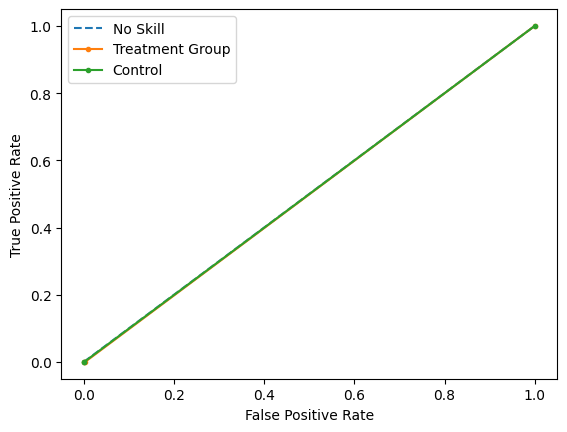

In [360]:
# Random model for AUC-ROC curve 
rnd_probs = [0 for _ in range(len(y_treatment_test))]
rnd_auc_score = roc_auc_score(y_treatment_test, rnd_probs)

from sklearn.metrics import roc_curve
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_treatment_test, rnd_probs)
treat_fpr, treat_tpr, _ = roc_curve(y_treatment_test, l1)
ctrl_fpr, ctrl_tpr, _ = roc_curve(y_control_test, l2)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(treat_fpr, treat_tpr, marker='.', label='Treatment Group')
plt.plot(ctrl_fpr, ctrl_tpr, marker='.', label='Control')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [581]:
import xgboost as xgb
from sklearn.model_selection import train_test_split


# Split the treatment data into training and testing sets
X_treatment = treatment_gp.drop(['treatment', 'conversion','exposure'], axis=1)
y_treatment = treatment_gp['conversion']
X_treatment_train, X_treatment_test, y_treatment_train, y_treatment_test = train_test_split(X_treatment, y_treatment, test_size=0.25, random_state=random_seed)

# Split the control data into training and testing sets
X_control = control_gp.drop(['treatment', 'conversion','exposure'], axis=1)
y_control = control_gp['conversion']
X_control_train, X_control_test, y_control_train, y_control_test = train_test_split(X_control, y_control, test_size=0.2, random_state=random_seed)

# Initialize the gradient boosting classifier
print('Fitting Target Group data to XGB Classifier')
xgb_treatment_model = xgb.XGBClassifier(random_state=random_seed)
xgb_treatment_model.fit(X_treatment_train, y_treatment_train)

# Build and train the control model
print('Fitting Control Group data to XGB Classifier')
xgb_control_model = xgb.XGBClassifier(random_state=random_seed)
xgb_control_model.fit(X_control_train, y_control_train)

# Make predictions on the testing sets
print("Making Predictions for Treatment and Control Group ")
treatment_predictions = xgb_treatment_model.predict_proba(X_treatment_test)
control_predictions = xgb_control_model.predict_proba(X_control_test)

# # Calculate the uplift for each individual
# uplift = treatment_predictions[:, 1] - control_predictions[:, 1]

# Evaluate the model using appropriate evaluation metrics
# ...


Fitting Target Group data to XGB Classifier
Fitting Control Group data to XGB Classifier
Making Predictions for Treatment and Control Group 


In [582]:
l1 = xgb_treatment_model.predict(X_treatment_test)
l2 = xgb_control_model.predict(X_control_test)

unique, counts = np.unique(l1, return_counts=True)
print('Treatment Group ', dict(zip(unique, counts)))
unique, counts = np.unique(l2, return_counts=True)
print('Control Group ',dict(zip(unique, counts))) 

Treatment Group  {0: 22110, 1: 6}
Control Group  {0: 3120}


In [583]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## Treatment Group 
print('Evaluation Scores for Treatment Group..')
# Calculate the accuracy of the model
accuracy = accuracy_score(y_treatment_test, l1)
print("Treatment Group Accuracy: {:.3f}".format(accuracy))

# Calculate the precision of the model
precision = precision_score(y_treatment_test, l1)
print("Treatment Group Precision: {:.3f}".format(precision))

# Calculate the recall of the model
recall = recall_score(y_treatment_test, l1)
print("Treatment Group Recall: {:.3f}".format(recall))

# Calculate the F1 score of the model
f1 = f1_score(y_treatment_test, l1)
print("Treatment Group F1 score: {:.3f}".format(f1))

# Calculate the AUC-ROC of the model
auc = roc_auc_score(y_treatment_test, l1)
print("Treatment Group AUC-ROC: {:.3f}".format(auc))


## Control Group 
print('\nEvaluation Scores for Control Group..')
# Calculate the accuracy of the model
accuracy = accuracy_score(y_control_test, l2)
print("Treatment Group Accuracy: {:.3f}".format(accuracy))

# Calculate the precision of the model
precision = precision_score(y_control_test, l2)
print("Treatment Group Precision: {:.3f}".format(precision))

# Calculate the recall of the model
recall = recall_score(y_control_test, l2)
print("Treatment Group Recall: {:.3f}".format(recall))

# Calculate the F1 score of the model
f1 = f1_score(y_control_test, l2)
print("Treatment Group F1 score: {:.3f}".format(f1))

# Calculate the AUC-ROC of the model
auc = roc_auc_score(y_control_test, l2)
print("Treatment Group AUC-ROC: {:.3f}".format(auc))

Evaluation Scores for Treatment Group..
Treatment Group Accuracy: 0.997
Treatment Group Precision: 0.167
Treatment Group Recall: 0.015
Treatment Group F1 score: 0.027
Treatment Group AUC-ROC: 0.507

Evaluation Scores for Control Group..
Treatment Group Accuracy: 0.999
Treatment Group Precision: 0.000
Treatment Group Recall: 0.000
Treatment Group F1 score: 0.000
Treatment Group AUC-ROC: 0.500


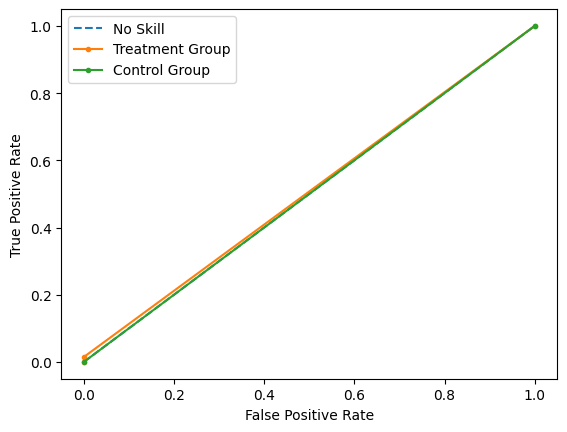

In [584]:
# Random model for AUC-ROC curve 
rnd_probs = [0 for _ in range(len(y_treatment_test))]
rnd_auc_score = roc_auc_score(y_treatment_test, rnd_probs)

from sklearn.metrics import roc_curve
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_treatment_test, rnd_probs)
treat_fpr, treat_tpr, _ = roc_curve(y_treatment_test, l1)
ctrl_fpr, ctrl_tpr, _ = roc_curve(y_control_test, l2)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(treat_fpr, treat_tpr, marker='.', label='Treatment Group')
plt.plot(ctrl_fpr, ctrl_tpr, marker='.', label='Control Group')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [585]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split


# Split the treatment data into training and testing sets
X_treatment = treatment_gp.drop(['treatment', 'conversion','exposure'], axis=1)
y_treatment = treatment_gp['conversion']
X_treatment_train, X_treatment_test, y_treatment_train, y_treatment_test = train_test_split(X_treatment, y_treatment, test_size=0.25, random_state=random_seed)

# Split the control data into training and testing sets
X_control = control_gp.drop(['treatment', 'conversion','exposure'], axis=1)
y_control = control_gp['conversion']
X_control_train, X_control_test, y_control_train, y_control_test = train_test_split(X_control, y_control, test_size=0.2, random_state=random_seed)

# Initialize the gradient boosting classifier
print('Fitting Target Group data to LGB Classifier')
# Initialize the gradient boosting classifier
lgb_treatment_model = lgb.LGBMClassifier(random_state=random_seed)
lgb_treatment_model.fit(X_treatment_train, y_treatment_train)

# Build and train the control model
print('Fitting Control Group data to LGB Classifier')
lgb_control_model = lgb.LGBMClassifier(random_state=random_seed)
lgb_control_model.fit(X_control_train, y_control_train)

# Make predictions on the testing sets
print("Making Predictions for Treatment and Control Group ")
treatment_predictions = lgb_treatment_model.predict_proba(X_treatment_test)
control_predictions = lgb_control_model.predict_proba(X_control_test)

# # Calculate the uplift for each individual
# uplift = treatment_predictions[:, 1] - control_predictions[:, 1]

# Evaluate the model using appropriate evaluation metrics
# ...



Fitting Target Group data to LGB Classifier
Fitting Control Group data to LGB Classifier
Making Predictions for Treatment and Control Group 


In [586]:
l1 = lgb_treatment_model.predict(X_treatment_test)
l2 = lgb_control_model.predict(X_control_test)

unique, counts = np.unique(l1, return_counts=True)
print('Treatment Group ', dict(zip(unique, counts)))
unique, counts = np.unique(l2, return_counts=True)
print('Control Group ',dict(zip(unique, counts))) 

Treatment Group  {0: 22092, 1: 24}
Control Group  {0: 3117, 1: 3}


In [587]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## Treatment Group 
print('Evaluation Scores for Treatment Group..')
# Calculate the accuracy of the model
accuracy = accuracy_score(y_treatment_test, l1)
print("Treatment Group Accuracy: {:.3f}".format(accuracy))

# Calculate the precision of the model
precision = precision_score(y_treatment_test, l1)
print("Treatment Group Precision: {:.3f}".format(precision))

# Calculate the recall of the model
recall = recall_score(y_treatment_test, l1)
print("Treatment Group Recall: {:.3f}".format(recall))

# Calculate the F1 score of the model
f1 = f1_score(y_treatment_test, l1)
print("Treatment Group F1 score: {:.3f}".format(f1))

# Calculate the AUC-ROC of the model
auc = roc_auc_score(y_treatment_test, l1)
print("Treatment Group AUC-ROC: {:.3f}".format(auc))


## Control Group 
print('\nEvaluation Scores for Control Group..')
# Calculate the accuracy of the model
accuracy = accuracy_score(y_control_test, l2)
print("Treatment Group Accuracy: {:.3f}".format(accuracy))

# Calculate the precision of the model
precision = precision_score(y_control_test, l2)
print("Treatment Group Precision: {:.3f}".format(precision))

# Calculate the recall of the model
recall = recall_score(y_control_test, l2)
print("Treatment Group Recall: {:.3f}".format(recall))

# Calculate the F1 score of the model
f1 = f1_score(y_control_test, l2)
print("Treatment Group F1 score: {:.3f}".format(f1))

# Calculate the AUC-ROC of the model
auc = roc_auc_score(y_control_test, l2)
print("Treatment Group AUC-ROC: {:.3f}".format(auc))

Evaluation Scores for Treatment Group..
Treatment Group Accuracy: 0.996
Treatment Group Precision: 0.000
Treatment Group Recall: 0.000
Treatment Group F1 score: 0.000
Treatment Group AUC-ROC: 0.499

Evaluation Scores for Control Group..
Treatment Group Accuracy: 0.998
Treatment Group Precision: 0.000
Treatment Group Recall: 0.000
Treatment Group F1 score: 0.000
Treatment Group AUC-ROC: 0.500


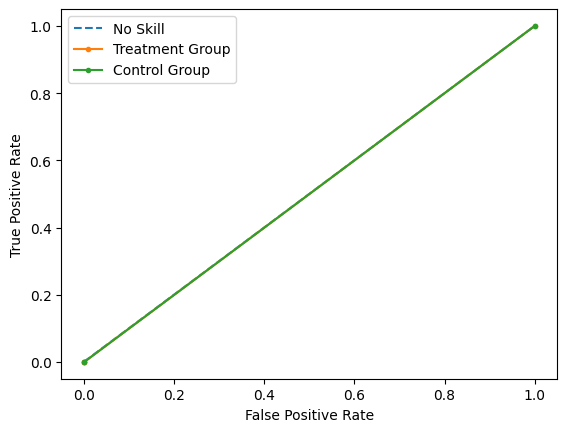

In [588]:
# Random model for AUC-ROC curve 
rnd_probs = [0 for _ in range(len(y_treatment_test))]
rnd_auc_score = roc_auc_score(y_treatment_test, rnd_probs)

from sklearn.metrics import roc_curve
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_treatment_test, rnd_probs)
treat_fpr, treat_tpr, _ = roc_curve(y_treatment_test, l1)
ctrl_fpr, ctrl_tpr, _ = roc_curve(y_control_test, l2)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(treat_fpr, treat_tpr, marker='.', label='Treatment Group')
plt.plot(ctrl_fpr, ctrl_tpr, marker='.', label='Control Group')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [311]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ## Treatment Group 
# print('Evaluation Scores for Treatment Group..')
# # Calculate the accuracy of the model
# accuracy = accuracy_score(y_treatment_test, treat_pred)
# print("Treatment Group Accuracy: {:.3f}".format(accuracy))

# # Calculate the precision of the model
# precision = precision_score(y_treatment_test, treat_pred)
# print("Treatment Group Precision: {:.3f}".format(precision))

# # Calculate the recall of the model
# recall = recall_score(y_treatment_test, treat_pred)
# print("Treatment Group Recall: {:.3f}".format(recall))

# # Calculate the F1 score of the model
# f1 = f1_score(y_treatment_test, treat_pred)
# print("Treatment Group F1 score: {:.3f}".format(f1))

# # Calculate the AUC-ROC of the model
# auc = roc_auc_score(y_treatment_test, treat_pred)
# print("Treatment Group AUC-ROC: {:.3f}".format(auc))


# ## Control Group 
# print('Evaluation Scores for Control Group..')
# # Calculate the accuracy of the model
# accuracy = accuracy_score(y_control_test, control_pred)
# print("Treatment Group Accuracy: {:.3f}".format(accuracy))

# # Calculate the precision of the model
# precision = precision_score(y_control_test, control_pred)
# print("Treatment Group Precision: {:.3f}".format(precision))

# # Calculate the recall of the model
# recall = recall_score(y_control_test, control_pred)
# print("Treatment Group Recall: {:.3f}".format(recall))

# # Calculate the F1 score of the model
# f1 = f1_score(y_control_test, control_pred)
# print("Treatment Group F1 score: {:.3f}".format(f1))

# # Calculate the AUC-ROC of the model
# auc = roc_auc_score(y_control_test, control_pred)
# print("Treatment Group AUC-ROC: {:.3f}".format(auc))

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df[["treatment", "exposure"]], df["uplift"], test_size=0.2)

# # Create a random forest regressor object and fit it to the training data
# model = RandomForestRegressor()
# model.fit(X_train, y_train)

# # Make predictions on the test data
# predictions = model.predict(X_test)

# # Calculate the predicted uplift score for each prediction
# predicted_uplift_scores = []
# for i in range(len(predictions)):
#     treatment_outcome = predictions[i] if X_test.iloc[i]["treatment"] == 1 else 0
#     control_outcome = predictions[i] if X_test.iloc[i]["treatment"] == 0 else 0
#     predicted_uplift_scores.append(treatment_outcome - control_outcome)

# # Evaluate the model's performance using evaluation metrics
# mse = mean_squared_error(y_test, predicted_uplift_scores)
# mae = mean_absolute_error(y_test, predicted_uplift_scores)


In [64]:
# import numpy as np
# import pandas as pd
# from causalml.inference.tree import UpliftRandomForestClassifier
# # from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split


# # X_train, X_test, y_train, y_test = train_test_split(df, conversion, test_size=0.2, random_state=random_seed)
# # treatment_train, treatment_test = train_test_split(treatment, test_size=0.2, random_state=random_seed)
# # conversion_train, conversion_test = train_test_split(conversion, test_size=0.2, random_state=random_seed)
# # visit_train, visit_test = train_test_split(conversion, test_size=0.2, random_state=random_seed)
# # exposure_train, exposure_test = train_test_split(conversion, test_size=0.2, random_state=random_seed)
# # customer_class_train, customer_class_test = train_test_split(customer_class, test_size=0.2, random_state=random_seed)





In [301]:
# import numpy as np
# import pandas as pd
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

# df = model_df[['category_name', 'status','delivery_diff','recency','grand_total','Payment_method','city','treatment']]

# # Split the data into treatment and control groups
# treatment_gp = df[df['treatment'] == 1]
# control_gp = df[df['treatment'] == 0]

# # Extract the features and target variable
# X = df.drop(['treatment'], axis=1)
# y = conversion.copy()

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit the scaler to the training data
# scaler.fit(X_train)

# # Scale the training and test data
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Initialize the SVM classifier
# model = SVC(kernel='rbf', random_state=random_seed)

# # Fit the model to the scaled training data
# print('Fitting Model to the train data')
# model.fit(X_train_scaled, y_train)

# # Make predictions on the scaled test set
# print('Predicting.....')
# predictions = model.predict(X_test_scaled)

# # Calculate the uplift score
# uplift = model.uplift(X_test, y_test)

# # Print the uplift score
# print(f'Uplift score: {uplift:.2f}')


In [24]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# # Calculate the accuracy of the model
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: {:.3f}".format(accuracy))

# # Calculate the precision of the model
# precision = precision_score(y_test, predictions)
# print("Precision: {:.3f}".format(precision))

# # Calculate the recall of the model
# recall = recall_score(y_test, predictions)
# print("Recall: {:.3f}".format(recall))

# # Calculate the F1 score of the model
# f1 = f1_score(y_test, predictions)
# print("F1 score: {:.3f}".format(f1))

# # Calculate the AUC-ROC of the model
# auc = roc_auc_score(y_test, predictions)
# print("AUC-ROC: {:.3f}".format(auc))


Accuracy: 0.997
Precision: 0.000
Recall: 0.000
F1 score: 0.000
AUC-ROC: 0.500


In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

# # Load the data into a Pandas DataFrame
# df = pd.read_csv('data.csv')

# # Split the data into treatment and control groups
# treatment = df[df['treatment'] == 1]
# control = df[df['treatment'] == 0]

# # Extract the features and target variable
# X = df.drop(['treatment', 'target'], axis=1)
# y = df['target']

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit the scaler to the training data
# scaler.fit(X_train)

# # Scale the training and test data
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Initialize the SVM classifier
# model = SVC(kernel='rbf', random_state=42)

# # Fit the model to the scaled training data
# model.fit(X_train_scaled, y_train)

# # Make predictions on the scaled test set
# predictions = model.predict(X_test_scaled)
# # Calculate the uplift score
# uplift = model.uplift(X_test, y_test)

# # Print the uplift score
# print(f'Uplift score: {uplift:.2f}')


In [302]:
# import xgboost as xgb

# # Initialize the gradient boosting classifier
# xgb_model = xgb.XGBClassifier(random_state=random_seed)

# # Fit the model to the training data
# xgb_model.fit(X_train, y_train)

# # Make predictions on the test set
# xgb_predictions = xgb_model.predict(X_test)

# # Calculate the uplift score
# xgb_uplift = xgb_model.uplift(X_test, y_test)

# # Print the uplift score
# print(f'Uplift score: {xgb_uplift:.2f}')


In [ ]:
# # Calculate the accuracy of the model
# accuracy = accuracy_score(y_test, xgb_predictions)
# print("Accuracy: {:.3f}".format(accuracy))

# # Calculate the precision of the model
# precision = precision_score(y_test, xgb_predictions)
# print("Precision: {:.3f}".format(precision))

# # Calculate the recall of the model
# recall = recall_score(y_test, xgb_predictions)
# print("Recall: {:.3f}".format(recall))

# # Calculate the F1 score of the model
# f1 = f1_score(y_test, xgb_predictions)
# print("F1 score: {:.3f}".format(f1))

# # Calculate the AUC-ROC of the model
# auc = roc_auc_score(y_test, xgb_predictions)
# print("AUC-ROC: {:.3f}".format(auc))


In [ ]:
# import numpy as np
# import pandas as pd
# import xgboost as xgb
# from sklearn.model_selection import train_test_split

# # Load the data into a Pandas DataFrame
# df = pd.read_csv('data.csv')

# # Split the data into treatment and control groups
# treatment = df[df['treatment'] == 1]
# control = df[df['treatment'] == 0]

# # Extract the features and target variable
# X = df.drop(['treatment', 'target'], axis=1)
# y = df['target']

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the gradient boosting classifier
# model = xgb.XGBClassifier(random_state=42)

# # Fit the model to the training data
# model.fit(X_train, y_train)

# # Make predictions on the test set
# predictions = model.predict(X_test)

# # Calculate the uplift score
# uplift = model.uplift(X_test, y_test)

# # Print the uplift score
# print(f'Uplift score: {uplift:.2f}')


In [316]:
# import lightgbm as lgb

# # Initialize the gradient boosting classifier
# lgb_model = lgb.LGBMClassifier(random_state=random_seed)

# # Fit the model to the training data
# lgb_model.fit(X_train, y_train)

# # Make predictions on the test set
# lgb_predictions = lgb_model.predict(X_test)

# # Calculate the uplift score
# lgb_uplift = lgb_model.uplift(X_test, y_test)

# # Print the uplift score
# print(f'Uplift score: {lgb_uplift:.2f}')


In [317]:
# # Calculate the accuracy of the model
# accuracy = accuracy_score(y_test, lgb_predictions)
# print("Accuracy: {:.3f}".format(accuracy))

# # Calculate the precision of the model
# precision = precision_score(y_test, lgb_predictions, average='weighted')
# print("Precision: {:.3f}".format(precision))

# # Calculate the recall of the model
# recall = recall_score(y_test, lgb_predictions, average='weighted')
# print("Recall: {:.3f}".format(recall))

# # Calculate the F1 score of the model
# f1 = f1_score(y_test, lgb_predictions, average='weighted')
# print("F1 score: {:.3f}".format(f1))

# # Calculate the AUC-ROC of the model
# auc = roc_auc_score(y_test, lgb_predictions, multi_class='ovo', average='weighted')
# print("AUC-ROC: {:.3f}".format(auc))


In [ ]:
# import numpy as np
# import pandas as pd
# import lightgbm as lgb
# from sklearn.model_selection import train_test_split
# # Load the data into a Pandas DataFrame
# df = pd.read_csv('data.csv')

# # Split the data into treatment and control groups
# treatment = df[df['treatment'] == 1]
# control = df[df['treatment'] == 0]

# # Extract the features and target variable
# X = df.drop(['treatment', 'target'], axis=1)
# y = df['target']

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the gradient boosting classifier
# model = lgb.LGBMClassifier(random_state=42)

# # Fit the model to the training data
# model.fit(X_train, y_train)

# # Make predictions on the test set
# predictions = model.predict(X_test)
# # Calculate the uplift score
# uplift = model.uplift(X_test, y_test)

# # Print the uplift score
# print(f'Uplift score: {uplift:.2f}')


AUC-Uplift (Area Under the Uplift curve) is an evaluation metric that is commonly used to assess the performance of an uplift model. It measures the model's ability to accurately predict the uplift for each individual in the treatment and control groups.

The uplift for an individual is defined as the difference in the predicted probability of the target variable between the treatment and control groups. AUC-Uplift is calculated as the area under the curve created by plotting the actual uplift against the predicted uplift. A model with a high AUC-Uplift score is able to accurately predict the uplift for a large proportion of individuals, while a model with a low AUC-Uplift score is less accurate in its predictions.

To implement AUC-Uplift in Python, you can use the roc_auc_score function from the scikit-learn library. Here is an example of how to calculate AUC-Uplift using this function:

from sklearn.metrics import roc_auc_score

* Calculate the predicted uplift for each individual in the test set
predicted_uplift = model.predict_proba(X_test)[:, 1] - model.predict_proba(X_test)[:, 0]

* Calculate the actual uplift for each individual in the test set
actual_uplift = y_test - (treatment_test == 0)

* Calculate the AUC-Uplift score
auc_uplift = roc_auc_score(actual_uplift, predicted_uplift)

* Print the AUC-Uplift score
print(f'AUC-Uplift score: {auc_uplift:.2f}')
